In [1]:
%matplotlib notebook

import json
from collections import defaultdict
from matplotlib import pyplot as plt

In [2]:
with open('pttgossip.json') as f:
    posts = json.load(f)

comments_total = defaultdict(int)
pushes_total = defaultdict(int)
hates_total = defaultdict(int)

for post in posts:
    for comment in post['comments']:
        user = comment['user']
        comments_total[user] += 1

        if comment['score'] > 0:
            pushes_total[user] += 1

        elif comment['score'] < 0:
            hates_total[user] += 1

<IPython.core.display.Javascript object>


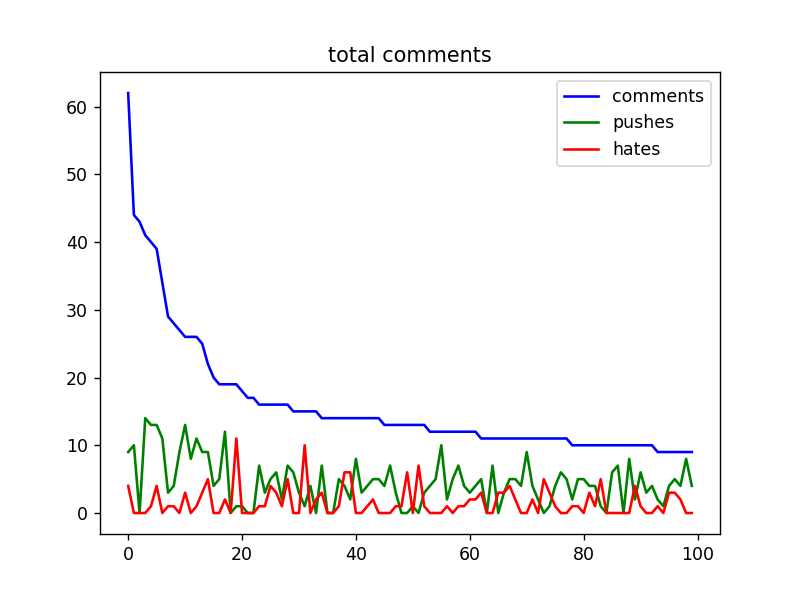

In [3]:
def comment_graph(comments, pushes, hates, max_x):
    sorted_users = [item[0] for item in sorted(comments.items(), key=lambda x: -x[1])][:max_x]
    y_comments = [comments[u] for u in sorted_users]
    y_pushes = [pushes[u] for u in sorted_users]
    y_hates = [hates[u] for u in sorted_users]

    x = range(len(sorted_users))

    plt.plot(x, y_comments, color='blue', label='comments')
    plt.plot(x, y_pushes, color='green', label='pushes')
    plt.plot(x, y_hates, color='red', label='hates')
    plt.legend()
    plt.title('total comments')
    plt.show()

comment_graph(comments_total, pushes_total, hates_total, 100)